In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
!git clone https://github.com/SkaMessi10/Hackoff_Data_BitsPlease.git

fatal: destination path 'Hackoff_Data_BitsPlease' already exists and is not an empty directory.


In [0]:
capital = pd.read_csv('/content/Hackoff_Data_BitsPlease/Machine Learning/Budget-Predictions/Capital_Expenditure1.csv')
military = pd.read_csv('/content/Hackoff_Data_BitsPlease/Machine Learning/Budget-Predictions/Military Expenditure1.csv')
social_sector = pd.read_csv('/content/Hackoff_Data_BitsPlease/Machine Learning/Budget-Predictions/Social_Sector_Expenditure1.csv')

In [77]:
capital.head()

,State,Total expenditure
0,1980-81,7856.0
1,1981-82,8095.0
2,1982-83,8505.0
3,1983-84,9738.0
4,1984-85,11509.0


In [78]:
capital.tail()

,State,Total expenditure
31,2011-12,286012.74
32,2012-13,312257.22
33,2013-14,337572.64
34,2014-15 (RE),447963.14
35,2015-16 (BE),498340.39


In [79]:
military.head()


,Year,Expenditure
0,1960,6.817657e+08
1,1961,8.142531e+08
2,1962,1.065436e+09
3,1963,1.795449e+09
4,1964,1.986654e+09


In [80]:
military.tail()

,Year,Expenditure
54,2014,5.091411e+10
55,2015,5.129548e+10
56,2016,5.663762e+10
57,2017,6.455944e+10
58,2018,6.651029e+10


In [81]:
social_sector.head()

,Year,Total expenditure(in crore rupees)
0,1980-81,6754
1,1981-82,7659
2,1982-83,9353
3,1983-84,10786
4,1984-85,12419


In [82]:
social_sector.tail()

,Year,Total expenditure(in crore rupees)
31,2011-12,538520
32,2012-13,618940
33,2013-14,696510
34,2014-15,1002230
35,2015-16 (RE),1074780


In [83]:
print(social_sector.count())

Year                                  36
Total expenditure(in crore rupees)    36
dtype: int64


In [84]:
print(military.count())
print(capital.count())

Year           59
Expenditure    59
dtype: int64
State                36
Total expenditure    36
dtype: int64


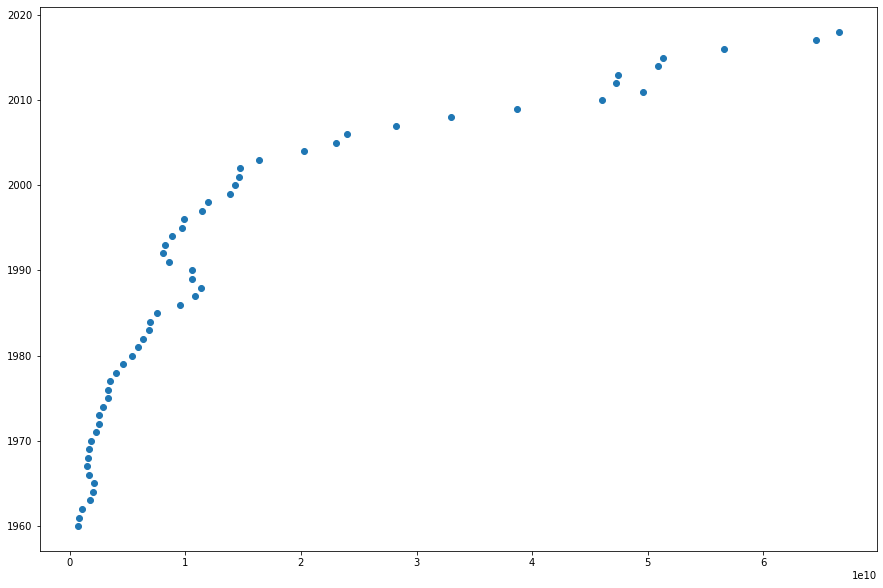

In [85]:
plt.figure(figsize=(15,10))
plt.scatter(military.iloc[:,1],military.iloc[:,0])
plt.show()

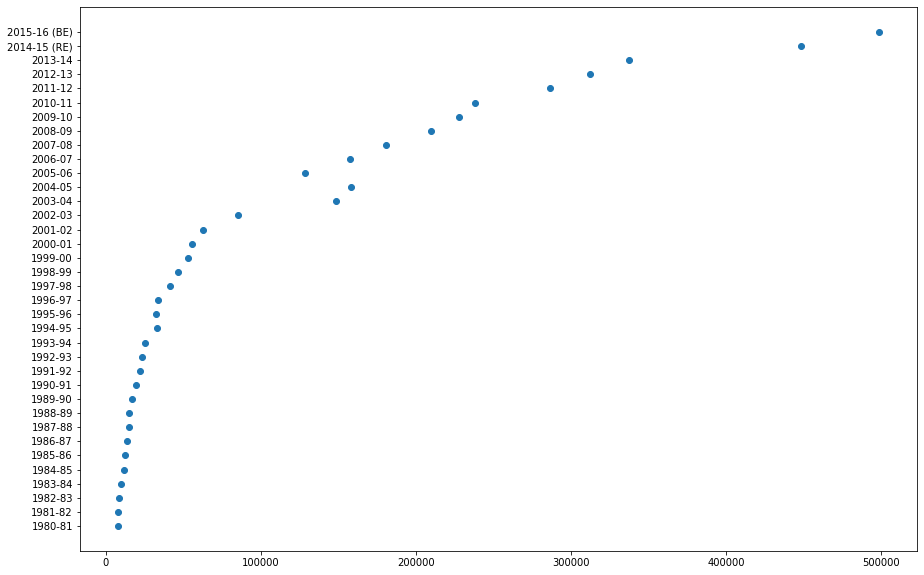

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(capital.iloc[:,1],capital.iloc[:,0])
plt.show()

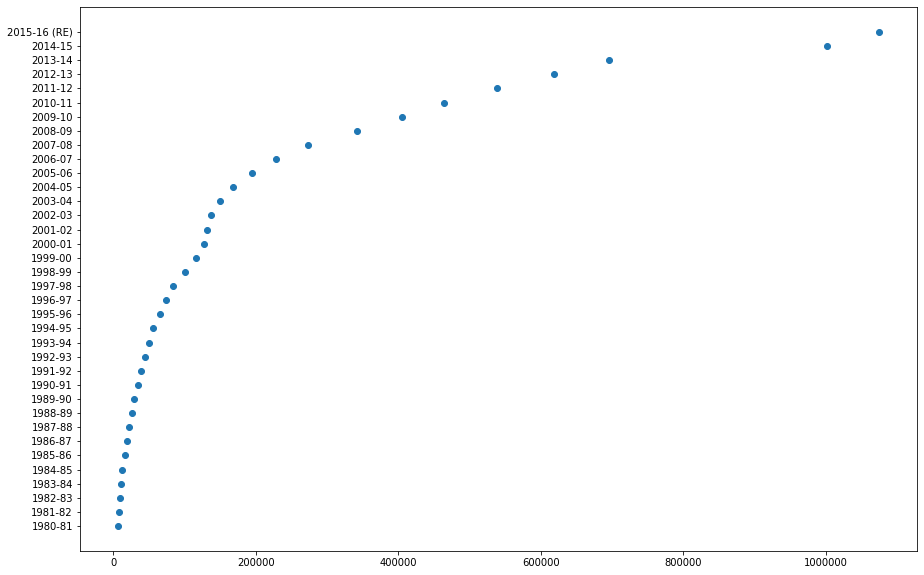

In [87]:
plt.figure(figsize=(15,10))
plt.scatter(social_sector.iloc[:,1],social_sector.iloc[:,0])
plt.show()

In [0]:
year = [x for x in range(1980,1980+36)]

In [89]:
print(year)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [90]:
capital.iloc[:,0]=year
social_sector.iloc[:,0]=year
print(social_sector.head())
print(capital.head())

   Year  Total expenditure(in crore rupees)
0  1980                                6754
1  1981                                7659
2  1982                                9353
3  1983                               10786
4  1984                               12419
   State  Total expenditure
0   1980             7856.0
1   1981             8095.0
2   1982             8505.0
3   1983             9738.0
4   1984            11509.0


In [91]:
military.shape

(59, 2)

In [92]:
military.head()

,Year,Expenditure
0,1960,6.817657e+08
1,1961,8.142531e+08
2,1962,1.065436e+09
3,1963,1.795449e+09
4,1964,1.986654e+09


In [0]:
military = military.set_index('Year')

social_sector = social_sector.set_index('Year')

capital = capital.set_index('State')

In [94]:
military.head()

,Expenditure
Year,
1960,6.817657e+08
1961,8.142531e+08
1962,1.065436e+09
1963,1.795449e+09
1964,1.986654e+09


In [0]:
from sklearn.preprocessing import MinMaxScaler
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
# normalize the dataset
scaler1 = MinMaxScaler(feature_range=(0, 1))

scaler2 = MinMaxScaler(feature_range=(0, 1))

scaler3 = MinMaxScaler(feature_range=(0, 1))

dataset1 = scaler1.fit_transform(military)

dataset2 = scaler2.fit_transform(social_sector)

dataset3 = scaler3.fit_transform(capital)

In [0]:
# split into train and test sets
train_size1 = int(len(dataset1) * 0.70)
test_size1 = len(dataset1) - train_size1
train1, test1 = dataset1[0:train_size1,:], dataset1[train_size1:len(dataset1),:]

train_size2 = int(len(dataset2) * 0.75)
test_size2 = len(dataset2) - train_size2
train2, test2 = dataset2[0:train_size2,:], dataset2[train_size2:len(dataset2),:]
https://github.com/SkaMessi10/Hackoff_Data_BitsPlease.git
train_size3 = int(len(dataset3) * 0.75)
test_size3 = len(dataset3) - train_size3
train3, test3 = dataset3[0:train_size3,:], dataset3[train_size3:len(dataset3),:]

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX1, trainY1 = create_dataset(train1, look_back)
testX1, testY1 = create_dataset(test1, look_back)

trainX2, trainY2 = create_dataset(train2, look_back)
testX2, testY2 = create_dataset(test2, look_back)

trainX3, trainY3 = create_dataset(train3, look_back)
testX3, testY3 = create_dataset(test3, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX1, (trainX1.shape[0], trainX1.shape[1], 1))
testX1 = np.reshape(testX1, (testX1.shape[0], testX1.shape[1], 1))
https://github.com/SkaMessi10/Hackoff_Data_BitsPlease.git
trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 1))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 1))

trainX3 = np.reshape(trainX3, (trainX3.shape[0], trainX3.shape[1], 1))
testX3 = np.reshape(testX3, (testX3.shape[0], testX3.shape[1], 1))

In [99]:
import keras
from keras.layers import LSTM,Dense,GRU
from keras.models import Sequential
# create and fit the LSTM network 
#for military
model1 = Sequential()
model1.add(LSTM(17, input_shape=(look_back, 1)))
model1.add(Dense(5))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(trainX1, trainY1, epochs=60, batch_size=1, verbose=2)

Epoch 1/60
 - 1s - loss: 0.0047
Epoch 2/60
 - 0s - loss: 0.0027
Epoch 3/60
 - 0s - loss: 0.0024
Epoch 4/60
 - 0s - loss: 0.0022
Epoch 5/60
 - 0s - loss: 0.0018
Epoch 6/60
 - 0s - loss: 0.0015
Epoch 7/60
 - 0s - loss: 0.0014
Epoch 8/60
 - 0s - loss: 0.0010
Epoch 9/60
 - 0s - loss: 7.1678e-04
Epoch 10/60
 - 0s - loss: 5.3223e-04
Epoch 11/60
 - 0s - loss: 3.7220e-04
Epoch 12/60
 - 0s - loss: 2.5111e-04
Epoch 13/60
 - 0s - loss: 1.9754e-04
Epoch 14/60
 - 0s - loss: 1.6487e-04
Epoch 15/60
 - 0s - loss: 1.2081e-04
Epoch 16/60
 - 0s - loss: 1.6092e-04
Epoch 17/60
 - 0s - loss: 1.4198e-04
Epoch 18/60
 - 0s - loss: 1.1321e-04
Epoch 19/60
 - 0s - loss: 1.3182e-04
Epoch 20/60
 - 0s - loss: 1.0717e-04
Epoch 21/60
 - 0s - loss: 1.3938e-04
Epoch 22/60
 - 0s - loss: 1.0973e-04
Epoch 23/60
 - 0s - loss: 1.1952e-04
Epoch 24/60
 - 0s - loss: 1.1696e-04
Epoch 25/60
 - 0s - loss: 1.1697e-04
Epoch 26/60
 - 0s - loss: 1.4488e-04
Epoch 27/60
 - 0s - loss: 1.2122e-04
Epoch 28/60
 - 0s - loss: 1.0818e-04
Epoch

In [100]:
# create and fit the LSTM network 
#for social_sector
model2 = Sequential()
model2.add(LSTM(17, input_shape=(look_back, 1)))
model2.add(Dense(5))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(trainX2, trainY2, epochs=60, batch_size=1, verbose=2)

Epoch 1/60
 - 2s - loss: 0.0030
Epoch 2/60
 - 0s - loss: 0.0027
Epoch 3/60
 - 0s - loss: 0.0026
Epoch 4/60
 - 0s - loss: 0.0024
Epoch 5/60
 - 0s - loss: 0.0021
Epoch 6/60
 - 0s - loss: 0.0020
Epoch 7/60
 - 0s - loss: 0.0016
Epoch 8/60
 - 0s - loss: 0.0015
Epoch 9/60
 - 0s - loss: 0.0015
Epoch 10/60
 - 0s - loss: 0.0013
Epoch 11/60
 - 0s - loss: 0.0011
Epoch 12/60
 - 0s - loss: 9.2452e-04
Epoch 13/60
 - 0s - loss: 7.9117e-04
Epoch 14/60
 - 0s - loss: 6.4907e-04
Epoch 15/60
 - 0s - loss: 5.0877e-04
Epoch 16/60
 - 0s - loss: 4.0598e-04
Epoch 17/60
 - 0s - loss: 3.2335e-04
Epoch 18/60
 - 0s - loss: 2.1502e-04
Epoch 19/60
 - 0s - loss: 1.5757e-04
Epoch 20/60
 - 0s - loss: 1.0368e-04
Epoch 21/60
 - 0s - loss: 8.0906e-05
Epoch 22/60
 - 0s - loss: 4.5934e-05
Epoch 23/60
 - 0s - loss: 3.2875e-05
Epoch 24/60
 - 0s - loss: 2.3253e-05
Epoch 25/60
 - 0s - loss: 1.8921e-05
Epoch 26/60
 - 0s - loss: 2.0202e-05
Epoch 27/60
 - 0s - loss: 1.7053e-05
Epoch 28/60
 - 0s - loss: 1.6626e-05
Epoch 29/60
 - 0s

In [101]:
# create and fit the LSTM network 
#for Capital
model3 = Sequential()
model3.add(LSTM(16, input_shape=(look_back, 1)))
model3.add(Dense(4))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(trainX3, trainY3, epochs=60, batch_size=1, verbose=2)

Epoch 1/60
 - 2s - loss: 0.0083
Epoch 2/60
 - 0s - loss: 0.0060
Epoch 3/60
 - 0s - loss: 0.0057
Epoch 4/60
 - 0s - loss: 0.0053
Epoch 5/60
 - 0s - loss: 0.0049
Epoch 6/60
 - 0s - loss: 0.0047
Epoch 7/60
 - 0s - loss: 0.0043
Epoch 8/60
 - 0s - loss: 0.0038
Epoch 9/60
 - 0s - loss: 0.0035
Epoch 10/60
 - 0s - loss: 0.0031
Epoch 11/60
 - 0s - loss: 0.0030
Epoch 12/60
 - 0s - loss: 0.0026
Epoch 13/60
 - 0s - loss: 0.0025
Epoch 14/60
 - 0s - loss: 0.0021
Epoch 15/60
 - 0s - loss: 0.0018
Epoch 16/60
 - 0s - loss: 0.0016
Epoch 17/60
 - 0s - loss: 0.0014
Epoch 18/60
 - 0s - loss: 0.0013
Epoch 19/60
 - 0s - loss: 0.0012
Epoch 20/60
 - 0s - loss: 0.0011
Epoch 21/60
 - 0s - loss: 0.0011
Epoch 22/60
 - 0s - loss: 0.0010
Epoch 23/60
 - 0s - loss: 9.8732e-04
Epoch 24/60
 - 0s - loss: 0.0011
Epoch 25/60
 - 0s - loss: 9.3851e-04
Epoch 26/60
 - 0s - loss: 0.0011
Epoch 27/60
 - 0s - loss: 0.0010
Epoch 28/60
 - 0s - loss: 0.0011
Epoch 29/60
 - 0s - loss: 9.8466e-04
Epoch 30/60
 - 0s - loss: 9.8041e-04
Epo

In [0]:
# make predictions
trainPredict1 = model1.predict(trainX1)
testPredict1 = model1.predict(testX1)

trainPredict2 = model2.predict(trainX2)
testPredict2 = model2.predict(testX2)

trainPredict3 = model3.predict(trainX3)
testPredict3 = model3.predict(testX3)

In [103]:
trainPredict1

array([[0.00459827],
       [0.0066147 ],
       [0.01044091],
       [0.02158514],
       [0.02450992],
       [0.0266428 ],
       [0.01953236],
       [0.01688326],
       [0.01839732],
       [0.01999508],
       [0.02215884],
       [0.0286227 ],
       [0.03233203],
       [0.0328332 ],
       [0.03844377],
       [0.04502841],
       [0.04458619],
       [0.04739055],
       [0.0550791 ],
       [0.06456493],
       [0.07744353],
       [0.08456212],
       [0.09114676],
       [0.09938933],
       [0.10135496],
       [0.11089614],
       [0.14187549],
       [0.16301525],
       [0.17044798],
       [0.15846314],
       [0.15762854],
       [0.12744655],
       [0.11898275],
       [0.12165411],
       [0.1315031 ],
       [0.14526732],
       [0.14763734],
       [0.17232716],
       [0.17956328]], dtype=float32)

In [0]:
# invert predictions
trainPredict1 = scaler1.inverse_transform(trainPredict1)
trainY1 = scaler1.inverse_transform([trainY1])
testPredict1 = scaler1.inverse_transform(testPredict1)
testY1 = scaler1.inverse_transform([testY1])


In [0]:
trainPredict2 = scaler2.inverse_transform(trainPredict2)
trainY2 = scaler2.inverse_transform([trainY2])
testPredict2 = scaler2.inverse_transform(testPredict2)
testY2 = scaler2.inverse_transform([testY2])


In [0]:
trainPredict3 = scaler3.inverse_transform(trainPredict3)
trainY3 = scaler3.inverse_transform([trainY3])
testPredict3 = scaler3.inverse_transform(testPredict3)
testY3 = scaler3.inverse_transform([testY3])

In [107]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore1 = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
print('Train Score for Military: %.2f RMSE' % (trainScore1))
testPredict1 += trainScore1
testScore1 = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test Score for Military: %.2f RMSE' % (testScore1))

trainScore2 = math.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
print('Train Score for Social Sector: %.2f RMSE' % (trainScore2))
testPredict2 += trainScore2
testScore2 = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score for Social Sector: %.2f RMSE' % (testScore2))

trainScore3 = math.sqrt(mean_squared_error(trainY3[0], trainPredict3[:,0]))
print('Train Score for Capital: %.2f RMSE' % (trainScore3))
testPredict3 += trainScore3
testScore3 = math.sqrt(mean_squared_error(testY3[0], testPredict3[:,0]))
print('Test Score for Capital: %.2f RMSE' % (testScore3))

Train Score for Military: 670937879.48 RMSE
Test Score for Military: 2916940792.15 RMSE
Train Score for Social Sector: 4117.00 RMSE
Test Score for Social Sector: 71352.76 RMSE
Train Score for Capital: 14516.72 RMSE
Test Score for Capital: 36651.23 RMSE


In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict1)+look_back, :] = trainPredict1

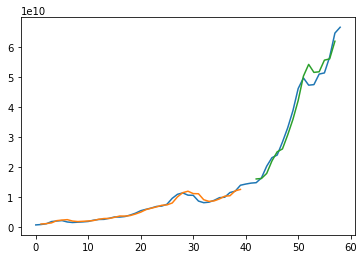

In [111]:

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict1)+(look_back*2)+1:len(dataset1)-1, :] = testPredict1
# plot baseline and predictions
plt.plot(scaler1.inverse_transform(dataset1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [121]:
model3.predict([2019])

ValueError: ignored

In [0]:
print(testY[-1])

[1.42875142e+10 1.46006423e+10 1.47496673e+10 1.63339866e+10
 2.02385665e+10 2.30723129e+10 2.39519280e+10 2.82547734e+10
 3.30023767e+10 3.87221544e+10 4.60904457e+10 4.96338158e+10
 4.72169200e+10 4.74035288e+10 5.09141083e+10 5.12954838e+10
 5.66376226e+10 6.45594353e+10]


In [0]:
print(testPredict)

[[1.4964864e+10]
 [1.5361092e+10]
 [1.5677831e+10]
 [1.5828631e+10]
 [1.7434094e+10]
 [2.1406411e+10]
 [2.4300659e+10]
 [2.5200587e+10]
 [2.9610416e+10]
 [3.4484011e+10]
 [4.0353087e+10]
 [4.7884673e+10]
 [5.1486122e+10]
 [4.9031348e+10]
 [4.9221153e+10]
 [5.2783174e+10]
 [5.3169070e+10]
 [5.8549092e+10]]


In [73]:
te

array([[0.        ],
       [0.00201261],
       [0.00582833],
       [0.01691795],
       [0.01982254],
       [0.02193918],
       [0.01487789],
       [0.01224344],
       [0.01374937],
       [0.01533784],
       [0.01748787],
       [0.02390288],
       [0.02757891],
       [0.0280753 ],
       [0.03362752],
       [0.04013277],
       [0.03969624],
       [0.04246359],
       [0.05003991],
       [0.05936595],
       [0.07199074],
       [0.07895121],
       [0.08537853],
       [0.0934094 ],
       [0.09532216],
       [0.10459384],
       [0.13455561],
       [0.1548818 ],
       [0.16200657],
       [0.15051274],
       [0.14971124],
       [0.12062717],
       [0.11243554],
       [0.11502274],
       [0.12454761],
       [0.13782322],
       [0.14010503],
       [0.16380616],
       [0.17072911],
       [0.20073057],
       [0.2066847 ],
       [0.21144142],
       [0.21370526],
       [0.23777263],
       [0.29708704],
       [0.34013443],
       [0.35349665],
       [0.418